In [1]:
import pandas, numpy, scipy

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'xtick.labelsize':20, 
                            'ytick.labelsize':20, 
                            'axes.labelsize':20, 
                            'figure.figsize':(12 * 0.6, 9 * 0.6)})

In [4]:
input_dir = '/Users/adrian/research/vigur/data/metabolomics/targeted/'

basic_input_file = 'EC008_ROSA_PMVEC_INTRA_BASIC.xlsx'
positive_input_file = 'EC008_ROSA_PMVEC_INTRA_POS.xlsx'
negative_input_file = 'EC008_ROSA_PMVEC_INTRA_NEG.xlsx'

### read metadata

In [5]:
metadata = pandas.read_excel(input_dir+positive_input_file, sheet_name=0, index_col=1)

new_labels = [element.split('_')[0] for element in metadata.index.values]
rosetta = dict(zip(metadata.index.values, new_labels))
metadata.rename(index=rosetta, inplace=True)
metadata.head()

,Sample,Sample ID,BioReplicate,Timepoint,µM catech,TecRep,TNFalpha,LPS,cell number,LCMS Method,LCMS Analytical Order,LCMS BATCH
Label,,,,,,,,,,,,
Pool1,PMUEC_INTRA_EC008_103,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,1,1
Pool1,PMUEC_INTRA_EC008_104,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,2,1
Pool1,PMUEC_INTRA_EC008_105,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,3,1
Pool2,PMUEC_INTRA_EC008_107,Pool2_pos,-,-,-,-,-,-,-,HILIC_POS_10min,4,1
008-02,PMUEC_INTRA_EC008_109,008-2,1,0,0,2,0,0,80000,HILIC_POS_10min,5,1


### read data

In [6]:
input_file = negative_input_file
    
path = input_dir + input_file
df = pandas.read_excel(path, sheet_name=1, index_col=0)

only_008 = [element for element in df.index if '008' in element]
subset = df.loc[only_008, :]

log2intensity = numpy.log2(subset+1)

In [7]:
new_labels = [element.split('_')[0] for element in log2intensity.index.values]
print(new_labels)
rosetta = dict(zip(log2intensity.index.values, new_labels))
log2intensity.rename(index=rosetta, inplace=True)
log2intensity.head()

['008-01', '008-02', '008-03', '008-04', '008-05', '008-06', '008-07', '008-08', '008-09', '008-10', '008-11', '008-12', '008-13', '008-14', '008-15', '008-16', '008-17', '008-18', '008-19', '008-20', '008-21', '008-22', '008-23', '008-24', '008-25', '008-26', '008-27', '008-28', '008-29', '008-30', '008-31', '008-32', '008-33', '008-34', '008-35', '008-36', '008-37', '008-38', '008-39', '008-40', '008-41', '008-42', '008-43', '008-44', '008-45']


,Phenylalanine IS,Glutamic Acid IS,AMP IS,Lysine IS,Panthotenic_Acid,Threonine,Serine,Valine,Glutamine,Aspartate,...,Lactate,beta-cytryl-glutamate,glycil-tyrosine,ADP-Ribose,NAD+,UDP-N-Acetyl_Glucosamine,N-acetyl-aspartate,Fumarate,Adrenaline sulfate 2,Adrenaline sulfate 3
Sample,,,,,,,,,,,,,,,,,,,,,
008-01,8.967307,11.629711,15.665472,11.402266,10.190411,8.850274,4.236799,4.657183,11.811601,9.689200,...,7.514533,11.707884,8.104342,9.622151,6.766118,9.160802,7.946824,3.719731,0.0,0.776525
008-02,9.643492,11.284449,15.628945,10.969325,10.352040,8.555264,3.978013,3.683921,12.290184,9.889781,...,7.647279,7.615505,8.731580,9.214220,6.413746,8.168577,7.478131,2.439623,0.0,1.795351
008-03,9.761782,11.341880,14.795001,11.769634,9.846899,8.844565,3.731618,4.727485,11.613734,9.733768,...,7.703516,9.116438,7.413856,9.718771,4.697329,6.690878,7.165811,1.745452,0.0,1.385707
008-04,9.823111,10.834224,15.831325,10.286581,10.566025,9.120448,1.137504,4.651281,12.603459,11.230368,...,7.957648,2.339422,9.083336,10.130667,6.109047,9.537265,7.674454,3.226817,0.0,1.585924
008-05,9.386242,10.584522,15.033158,11.657708,9.604401,8.687785,4.171607,5.532348,12.598412,11.025167,...,7.831694,9.439222,12.786889,9.256534,3.317159,8.865761,6.778248,2.951588,0.0,0.000000


In [8]:
internal_standards = [element for element in log2intensity.columns if 'IS' in element]
print(internal_standards)

['Phenylalanine IS', 'Glutamic Acid IS', 'AMP IS', 'Lysine IS']


In [9]:
matplotlib.colors.TABLEAU_COLORS.keys()

dict_keys(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])

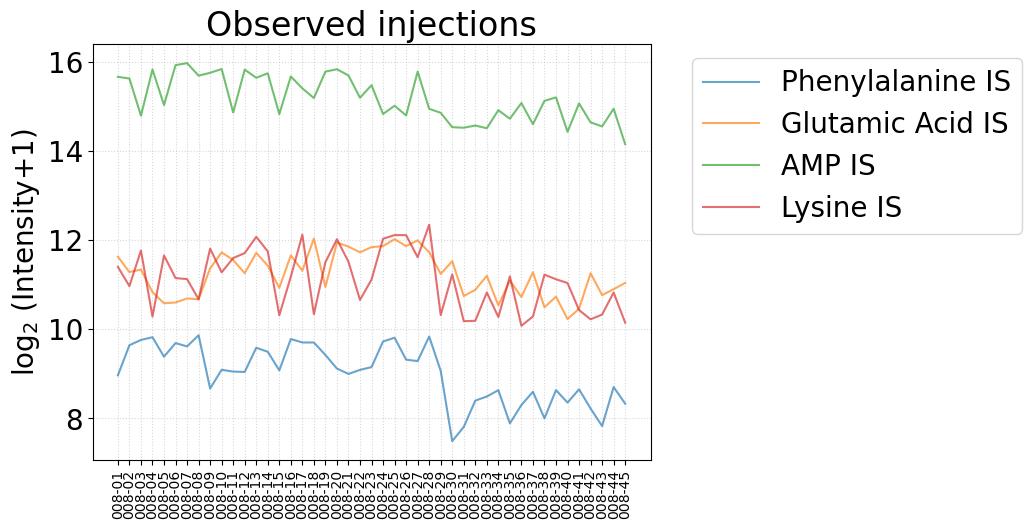

In [10]:
trend = log2intensity[internal_standards].mean(axis=1)
average = numpy.mean(trend)

tabcolors = list(matplotlib.colors.TABLEAU_COLORS.keys())

for i in range(len(internal_standards)):
    internal_standard = internal_standards[i]
    plotting_color = tabcolors[i]
    matplotlib.pyplot.plot(log2intensity[internal_standard], '-', color=plotting_color, ms=12, alpha=2/3, label=internal_standard)

matplotlib.pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
matplotlib.pyplot.title('Observed injections')
matplotlib.pyplot.ylabel('log$_2$ (Intensity+1)')
matplotlib.pyplot.xticks(rotation=90, fontsize=10)
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.show()

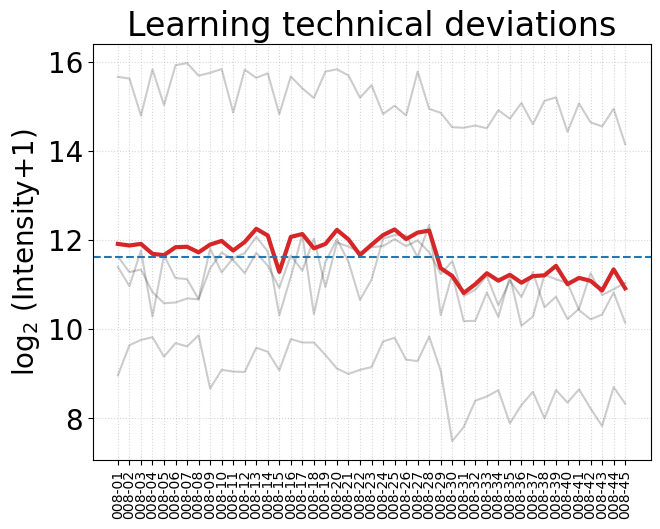

In [11]:
trend = log2intensity[internal_standards].mean(axis=1)
average = numpy.mean(trend)
for internal_standard in internal_standards:

    matplotlib.pyplot.plot(log2intensity[internal_standard], '-', color='black', ms=12, alpha=1/5)

matplotlib.pyplot.plot(log2intensity[internal_standards].mean(axis=1), '-', color='tab:red', lw=3)
matplotlib.pyplot.axhline(average, ls='--', color='tab:blue')

matplotlib.pyplot.title('Learning technical deviations')
matplotlib.pyplot.ylabel('log$_2$ (Intensity+1)')
matplotlib.pyplot.xticks(rotation=90, fontsize=10)
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.show

correction = -(trend - average)

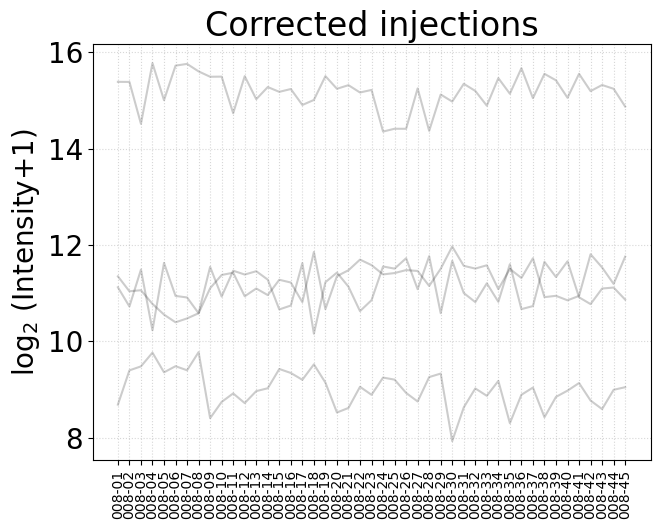

In [12]:
for internal_standard in internal_standards:
    injection = log2intensity[internal_standard]
    corrected = injection + correction
    matplotlib.pyplot.plot(corrected, '-', color='black', ms=12, alpha=1/5)

matplotlib.pyplot.title('Corrected injections')
matplotlib.pyplot.ylabel('log$_2$ (Intensity+1)')
matplotlib.pyplot.xticks(rotation=90, fontsize=10)
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.show()

In [13]:
the_colors = ['tab:green', 'tab:red', 'tab:orange', 'tab:purple']
metabolites = ['Methanephrine sulfate', 'Adrenaline sulfate', 'Adrenaline sulfate 2', 'Adrenaline sulfate 3']

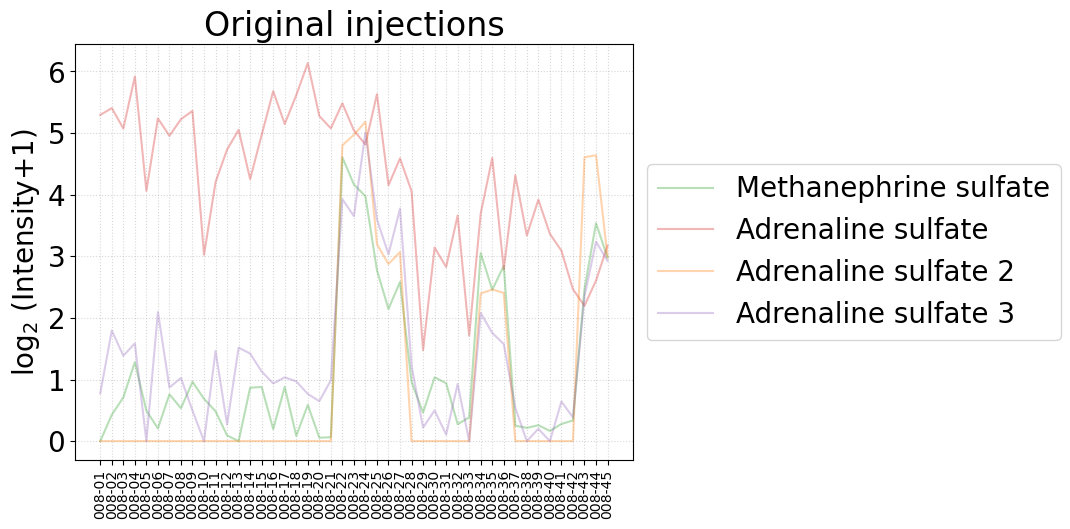

In [14]:
for i in range(len(metabolites)):
    
    metabolite = metabolites[i]
    injection = log2intensity[metabolite]
    corrected = injection + correction

    matplotlib.pyplot.plot(injection, '-', color=the_colors[i], ms=12, alpha=1/3, label=metabolite)
    
    #matplotlib.pyplot.plot(corrected, '-', color=the_colors[i], ms=12, alpha=1/3, label=metabolite)
matplotlib.pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
matplotlib.pyplot.title('Original injections')
matplotlib.pyplot.ylabel('log$_2$ (Intensity+1)')
matplotlib.pyplot.xticks(rotation=90, fontsize=10)
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.show()

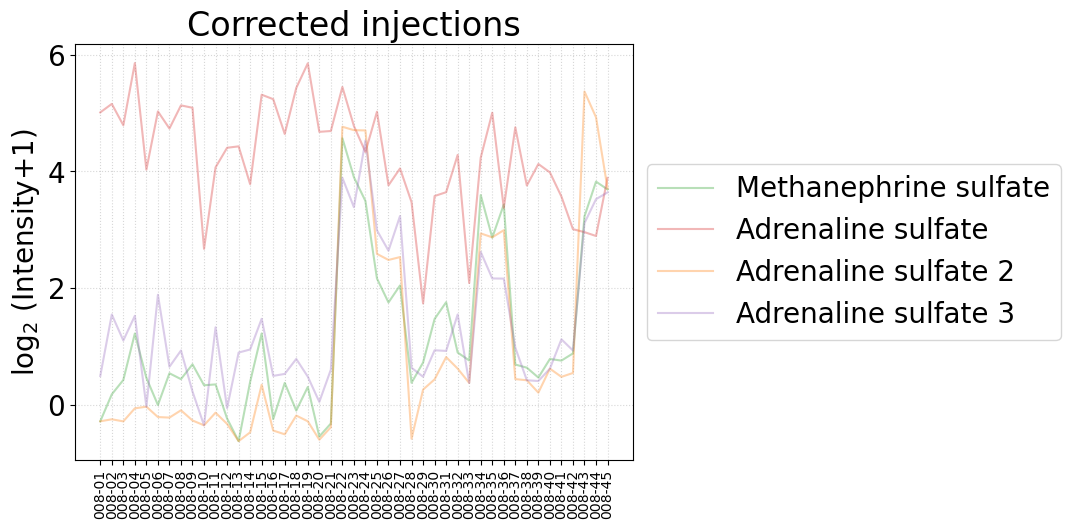

In [15]:
for i in range(len(metabolites)):
    
    metabolite = metabolites[i]
    injection = log2intensity[metabolite]
    corrected = injection + correction

    #matplotlib.pyplot.plot(injection, '-', color=the_colors[i], ms=12, alpha=1/3, label=metabolite)
    matplotlib.pyplot.plot(corrected, '-', color=the_colors[i], ms=12, alpha=1/3, label=metabolite)

matplotlib.pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
matplotlib.pyplot.title('Corrected injections')
matplotlib.pyplot.ylabel('log$_2$ (Intensity+1)')
matplotlib.pyplot.xticks(rotation=90, fontsize=10)
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.show()

['E1.T0.0', 'E1.T0.0', 'E1.T0.0', 'E1.T4.0', 'E1.T4.0', 'E1.T4.0', 'E1.T4.5', 'E1.T4.5', 'E1.T4.5', 'E1.T24.0', 'E1.T24.0', 'E1.T24.0', 'E1.T24.5', 'E1.T24.5', 'E1.T24.5', 'E2.T0.0', 'E2.T0.0', 'E2.T0.0', 'E2.T4.0', 'E2.T4.0', 'E2.T4.0', 'E2.T4.5', 'E2.T4.5', 'E2.T4.5', 'E2.T24.0', 'E2.T24.0', 'E2.T24.0', 'E2.T24.5', 'E2.T24.5', 'E2.T24.5', 'E3.T0.0', 'E3.T0.0', 'E3.T0.0', 'E3.T4.0', 'E3.T4.0', 'E3.T4.0', 'E3.T4.5', 'E3.T4.5', 'E3.T4.5', 'E3.T24.0', 'E3.T24.0', 'E3.T24.0', 'E3.T24.5', 'E3.T24.5', 'E3.T24.5']


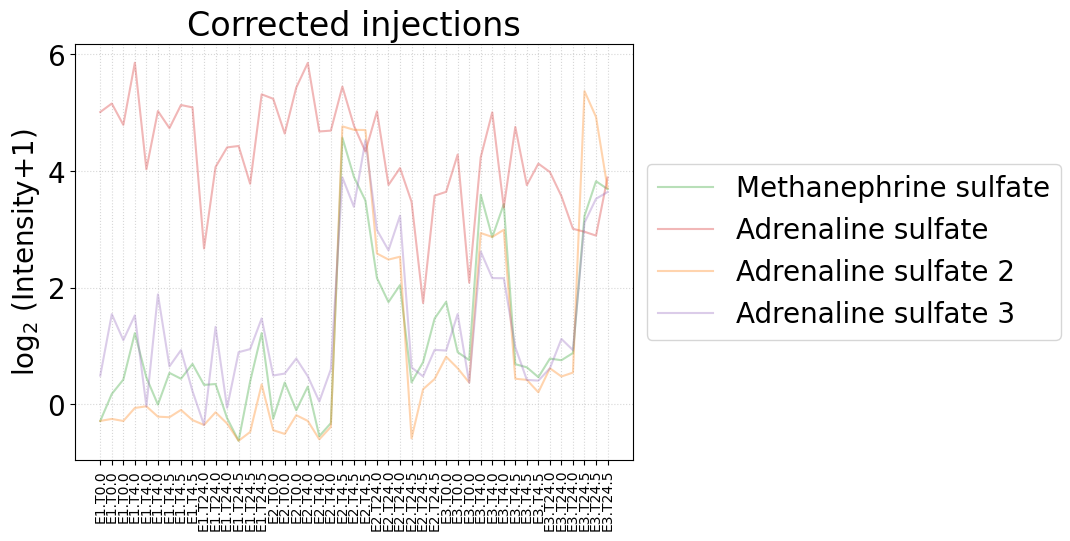

In [16]:
for i in range(len(metabolites)):
    
    metabolite = metabolites[i]
    injection = log2intensity[metabolite]
    corrected = injection + correction

    #matplotlib.pyplot.plot(injection, '-', color=the_colors[i], ms=12, alpha=1/3, label=metabolite)
    matplotlib.pyplot.plot(corrected, '-', color=the_colors[i], ms=12, alpha=1/3, label=metabolite)

matplotlib.pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
matplotlib.pyplot.title('Corrected injections')
matplotlib.pyplot.ylabel('log$_2$ (Intensity+1)')

new_labels = []
for label in corrected.keys():
    treatment = metadata.loc[label, 'µM catech']
    timepoint = metadata.loc[label, 'Timepoint']
    experiment = metadata.loc[label, 'BioReplicate']
    new_label = 'E{}.T{}.{}'.format(experiment, timepoint, treatment)
    new_labels.append(new_label)
print(new_labels)
matplotlib.pyplot.xticks(range(len(new_labels)), new_labels, rotation=90, fontsize=10)

matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.show()

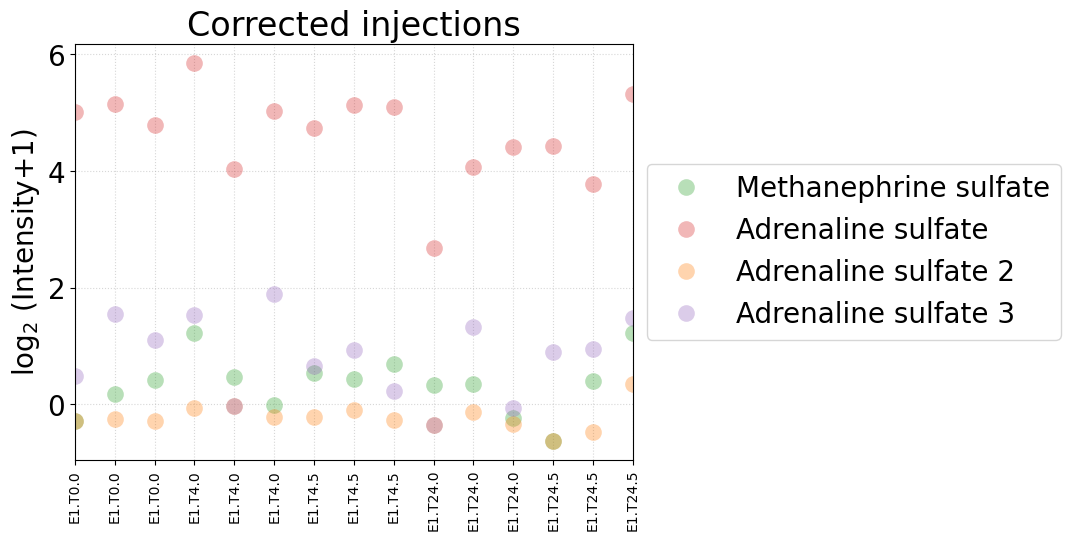

In [17]:
for i in range(len(metabolites)):
    
    metabolite = metabolites[i]
    injection = log2intensity[metabolite]
    corrected = injection + correction

    #matplotlib.pyplot.plot(injection, '-', color=the_colors[i], ms=12, alpha=1/3, label=metabolite)
    matplotlib.pyplot.plot(corrected, 'o', color=the_colors[i], ms=12, alpha=1/3, label=metabolite, mec='none')

matplotlib.pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
matplotlib.pyplot.title('Corrected injections')
matplotlib.pyplot.ylabel('log$_2$ (Intensity+1)')

new_labels = []
for label in corrected.keys():
    treatment = metadata.loc[label, 'µM catech']
    timepoint = metadata.loc[label, 'Timepoint']
    experiment = metadata.loc[label, 'BioReplicate']
    new_label = 'E{}.T{}.{}'.format(experiment, timepoint, treatment)
    new_labels.append(new_label)
matplotlib.pyplot.xticks(range(len(new_labels)), new_labels, rotation=90, fontsize=10)

matplotlib.pyplot.xlim(0, 14)
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.show()
#
# conclusion. no apparent effect
#

['E1.T0.0', 'E1.T0.0', 'E1.T0.0', 'E1.T4.0', 'E1.T4.0', 'E1.T4.0', 'E1.T4.5', 'E1.T4.5', 'E1.T4.5', 'E1.T24.0', 'E1.T24.0', 'E1.T24.0', 'E1.T24.5', 'E1.T24.5', 'E1.T24.5', 'E2.T0.0', 'E2.T0.0', 'E2.T0.0', 'E2.T4.0', 'E2.T4.0', 'E2.T4.0', 'E2.T4.5', 'E2.T4.5', 'E2.T4.5', 'E2.T24.0', 'E2.T24.0', 'E2.T24.0', 'E2.T24.5', 'E2.T24.5', 'E2.T24.5', 'E3.T0.0', 'E3.T0.0', 'E3.T0.0', 'E3.T4.0', 'E3.T4.0', 'E3.T4.0', 'E3.T4.5', 'E3.T4.5', 'E3.T4.5', 'E3.T24.0', 'E3.T24.0', 'E3.T24.0', 'E3.T24.5', 'E3.T24.5', 'E3.T24.5']


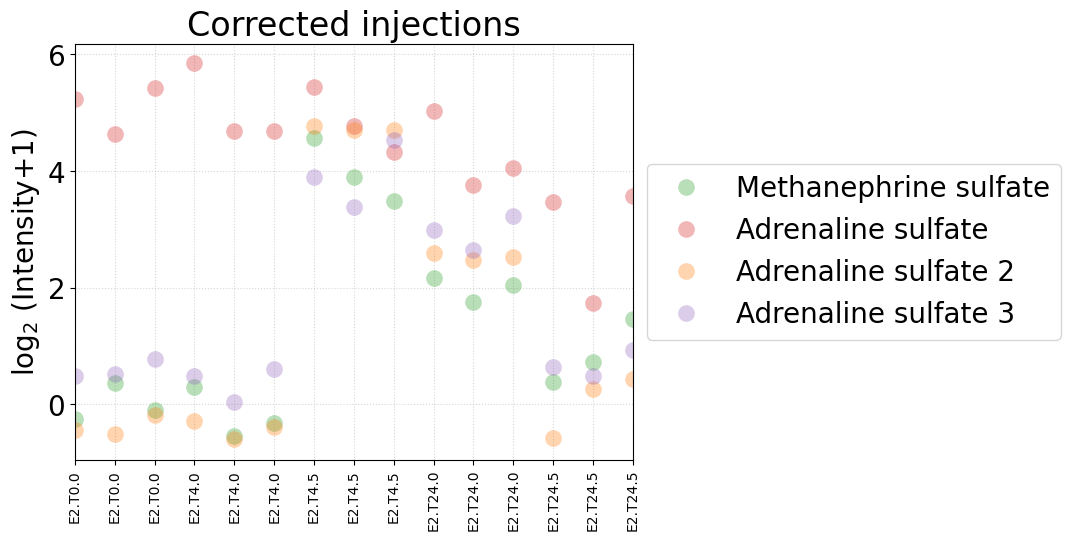

In [18]:
for i in range(len(metabolites)):
    
    metabolite = metabolites[i]
    injection = log2intensity[metabolite]
    corrected = injection + correction

    #matplotlib.pyplot.plot(injection, '-', color=the_colors[i], ms=12, alpha=1/3, label=metabolite)
    matplotlib.pyplot.plot(corrected, 'o', color=the_colors[i], ms=12, alpha=1/3, label=metabolite, mec='none')

matplotlib.pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
matplotlib.pyplot.title('Corrected injections')
matplotlib.pyplot.ylabel('log$_2$ (Intensity+1)')

new_labels = []
for label in corrected.keys():
    treatment = metadata.loc[label, 'µM catech']
    timepoint = metadata.loc[label, 'Timepoint']
    experiment = metadata.loc[label, 'BioReplicate']
    new_label = 'E{}.T{}.{}'.format(experiment, timepoint, treatment)
    new_labels.append(new_label)
print(new_labels)
matplotlib.pyplot.xticks(range(len(new_labels)), new_labels, rotation=90, fontsize=10)

matplotlib.pyplot.xlim(15, 29)
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.show()
#
# conclusion. T4h OK, but we have more adrenaline in NT than T at 24 h
#

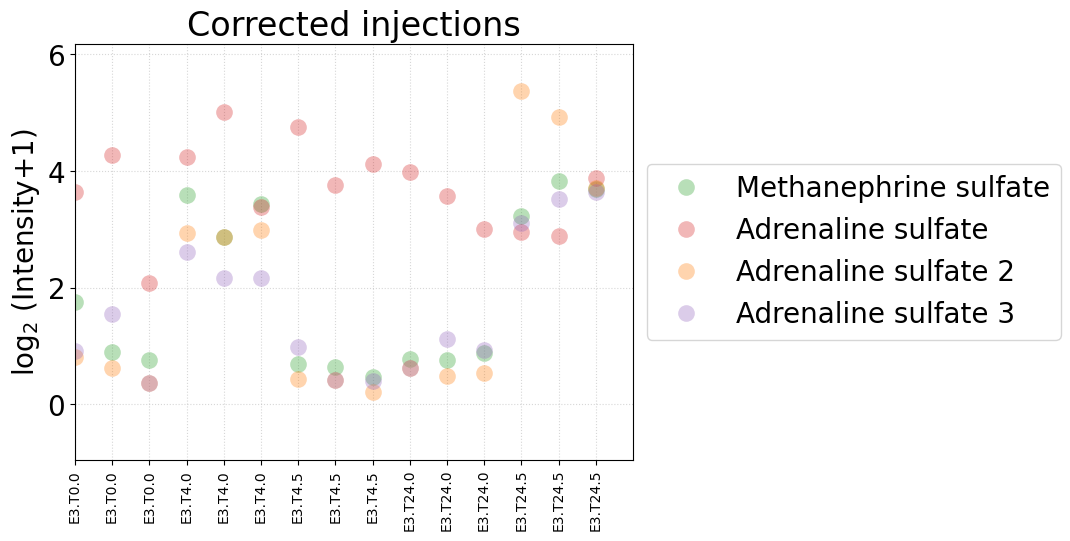

In [19]:
for i in range(len(metabolites)):
    
    metabolite = metabolites[i]
    injection = log2intensity[metabolite]
    corrected = injection + correction

    #matplotlib.pyplot.plot(injection, '-', color=the_colors[i], ms=12, alpha=1/3, label=metabolite)
    matplotlib.pyplot.plot(corrected, 'o', color=the_colors[i], ms=12, alpha=1/3, label=metabolite, mec='none')

matplotlib.pyplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
matplotlib.pyplot.title('Corrected injections')
matplotlib.pyplot.ylabel('log$_2$ (Intensity+1)')

new_labels = []
for label in corrected.keys():
    treatment = metadata.loc[label, 'µM catech']
    timepoint = metadata.loc[label, 'Timepoint']
    experiment = metadata.loc[label, 'BioReplicate']
    new_label = 'E{}.T{}.{}'.format(experiment, timepoint, treatment)
    new_labels.append(new_label)
matplotlib.pyplot.xticks(range(len(new_labels)), new_labels, rotation=90, fontsize=10)

matplotlib.pyplot.xlim(30, 45)
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.show()
#
# conclusion. at 4h, adrenaline goes down compared to reference. At 24h seems ok
#

# show some other metabolites of interest using boxplots

In [25]:
# AMP, ADP, ATP, cAMP, UMP
metabolites_of_interest = ['AMP IS', 'AMP', 'cAMP', 'UMP']

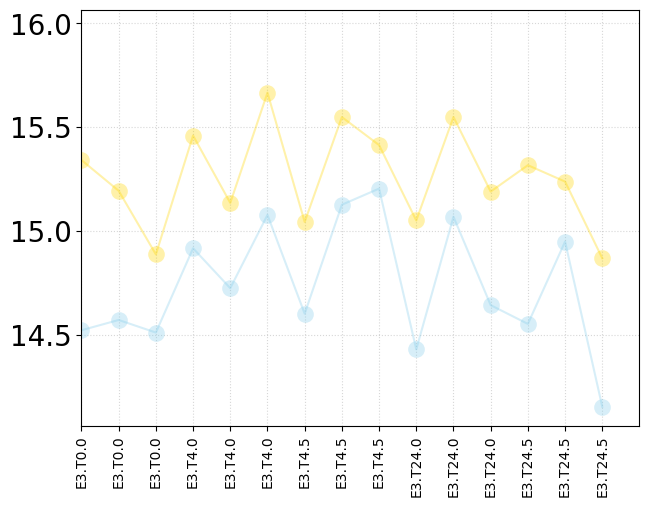

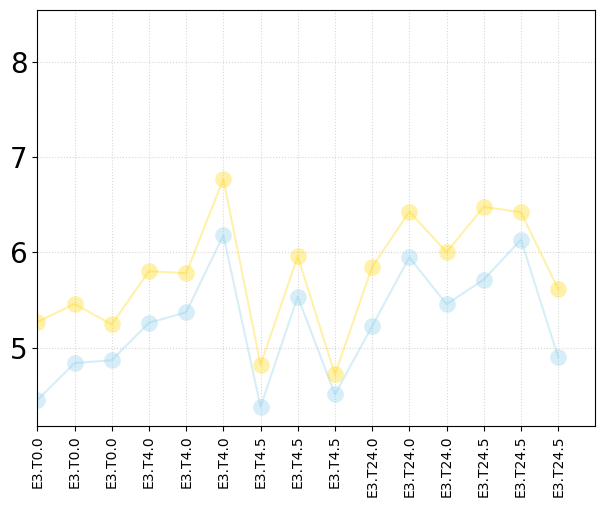

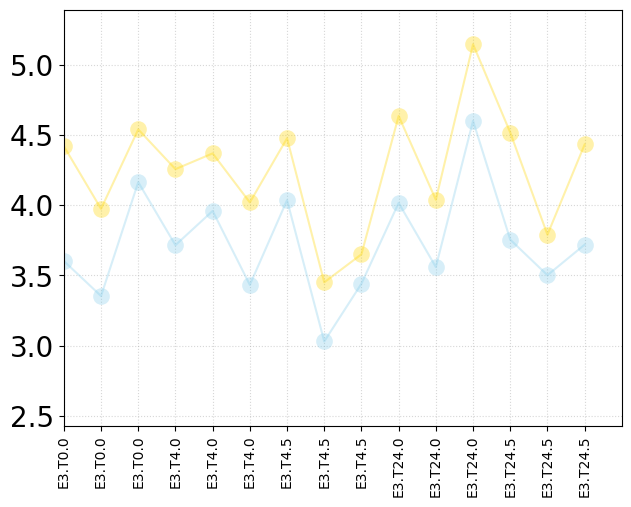

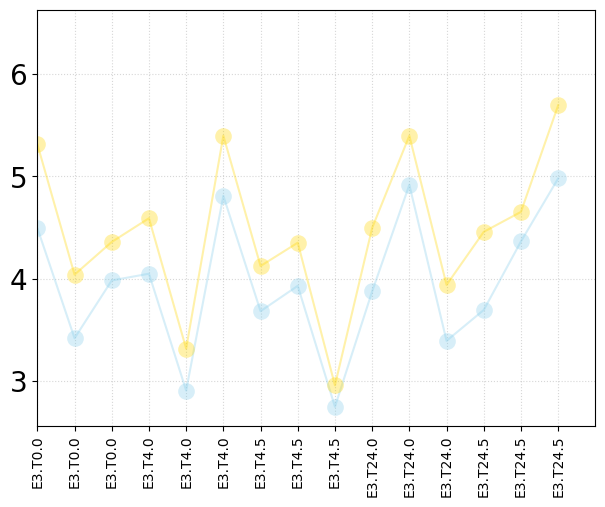

In [31]:
for i in range(len(metabolites_of_interest)):
    
    metabolite = metabolites_of_interest[i]
    injection = log2intensity[metabolite]
    corrected = injection + correction

    matplotlib.pyplot.plot(injection, 'o-', color='skyblue', ms=12, alpha=1/3, label=metabolite, mec='none')
    matplotlib.pyplot.plot(corrected, 'o-', color='gold', ms=12, alpha=1/3, label=metabolite, mec='none')

    new_labels = []
    for label in corrected.keys():
        treatment = metadata.loc[label, 'µM catech']
        timepoint = metadata.loc[label, 'Timepoint']
        experiment = metadata.loc[label, 'BioReplicate']
        new_label = 'E{}.T{}.{}'.format(experiment, timepoint, treatment)
        new_labels.append(new_label)
    matplotlib.pyplot.xticks(range(len(new_labels)), new_labels, rotation=90, fontsize=10)
    
    matplotlib.pyplot.xlim(30, 45)
    matplotlib.pyplot.grid(alpha=0.5, ls=':')
    matplotlib.pyplot.show()

plot before and after correction.

Then do boxplots.





### correction

In [ ]:
log2intensity.head()

In [ ]:
correction.head()

In [ ]:
log2intensity_corrected = log2intensity.add(correction, axis=0)
log2intensity_corrected.head()

### PCA

In [ ]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(log2intensity_corrected)
model = sklearn.decomposition.PCA(n_components=2)
locations = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_

for j in range(len(locations)):
    label = log2intensity_corrected.index[j]

    # treatment
    treatment = metadata.loc[label, 'µM catech']
    if treatment == 0:
        the_color = 'black'
    elif treatment == 5:
        the_color = 'tab:red'
    else:
        print(treatment)
        raise ValueError('unknown treatment')
    # timepoint
    timepoint = metadata.loc[label, 'Timepoint']
    if timepoint == 0:
        the_marker = 'X'
    elif timepoint == 4:
        the_marker = 'o'
    elif timepoint == 24:
        the_marker = 's'
    else:
        raise ValueError('unknown timepoint')
    # replicate
    replicate = metadata.loc[label, 'BioReplicate']
    # plot
    matplotlib.pyplot.scatter(locations[j, 0], locations[j, 1], 
                              s=500, c=the_color, alpha=2/3, edgecolors='none', marker=the_marker)
    matplotlib.pyplot.text(locations[j, 0], locations[j, 1], replicate, 
                           fontsize=8, color='white', ha='center', va='center', weight='bold')

matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')

### identify differences

In [ ]:
print(log2intensity_corrected.shape)
log2intensity_corrected.head()

In [ ]:
for metabolite in log2intensity_corrected.columns:
    print(metabolite)
    for bio_rep in [1, 2, 3]:
        for time_point in [4, 24]:
        
            rules = (metadata['BioReplicate'] == bio_rep) & (metadata['Timepoint'] == time_point) & (metadata['µM catech'] == 0) 
            sampleIDs = list(metadata[rules].index.values)
            reference_values = log2intensity_corrected.loc[sampleIDs, metabolite].values
    
            rules = (metadata['BioReplicate'] == bio_rep) & (metadata['Timepoint'] == time_point) & (metadata['µM catech'] == 5) 
            sampleIDs = list(metadata[rules].index.values)
            drug_values = log2intensity_corrected.loc[sampleIDs, metabolite].values

            a = numpy.mean(drug_values)
            b = numpy.mean(reference_values)
            log2FC = a - b
            averageI = numpy.mean([a, b])
            [statistic, pvalue] = scipy.stats.ttest_ind(drug_values, reference_values)
            
            if pvalue < 0.05:
                message = '\t {} Exp. {} T={} \t\t log2FC={:.2f} P={:.2e} \t\t I={:.2f}'.format(metabolite, bio_rep, time_point, log2FC, pvalue, averageI)
                print(message)
            else:
                pass
                #message = '\t {} Exp. {} T={} \t\t log2FC={:.2f} P={:.2e} \t\t I={:.2f}'.format(metabolite, bio_rep, time_point, log2FC, pvalue, averageI)
            #print(message)

#
# conclusion
#

# serine could be a candidate, but fold-change is opposite trend on each experiment.
# same for phenylalanine
# same for Pentose phosphate pool
# Methanephrine sulfate goes up and down. Really concerning! This pattern is present in adrenaline sulfate.